In [1]:
import pandas as pd
import numpy as np
import igraph as ig
import matplotlib.pyplot as plt 

In [2]:
df_unweighted = pd.read_csv('combined_final_unweighted.csv')
df_unweighted

,node_start,node_end,status
0,Hong Kong,Samoa,jurisdiction
1,Hong Kong,Samoa,jurisdiction
2,Hong Kong,Samoa,jurisdiction
3,Hong Kong,Samoa,jurisdiction
4,Hong Kong,Samoa,jurisdiction
...,...,...,...
338127,Indonesia,British Virgin Islands,officer_base
338128,Cook Islands,British Virgin Islands,officer_base
338129,Hong Kong,British Virgin Islands,officer_base
338130,Cook Islands,United Kingdom,officer_base


In [3]:
df_weighted = pd.read_csv('combined_final_weighted.csv')
df_weighted

,node_start,node_end,status,weight
0,Hong Kong,Samoa,jurisdiction,2.0
1,Hong Kong,Samoa,jurisdiction,2.0
2,Hong Kong,Samoa,jurisdiction,2.0
3,Hong Kong,Samoa,jurisdiction,2.0
4,Hong Kong,Samoa,jurisdiction,2.0
...,...,...,...,...
338119,Indonesia,British Virgin Islands,officer_base,1.0
338120,Cook Islands,British Virgin Islands,officer_base,1.0
338121,Hong Kong,British Virgin Islands,officer_base,1.0
338122,Cook Islands,United Kingdom,officer_base,1.0


In [4]:
df_undir = pd.read_csv('undirected_weighted_grouped.csv')
df_undir

,node_1,node_2,weight
0,Albania,Bahamas,4.0
1,Algeria,British Virgin Islands,2.0
2,Algeria,United Kingdom,2.0
3,Algeria,United States,1.0
4,Andorra,Bahamas,52.0
...,...,...,...
2383,Hong Kong,Zimbabwe,3.0
2384,Jersey,Zimbabwe,1.0
2385,Panama,Zimbabwe,6.0
2386,Russia,Zimbabwe,2.0


In [5]:
#plot the unweighted graph (try unweighted first)
g = ig.Graph.TupleList(df_undir.itertuples(index=False), directed=False, edge_attrs={'weight': "weight"})


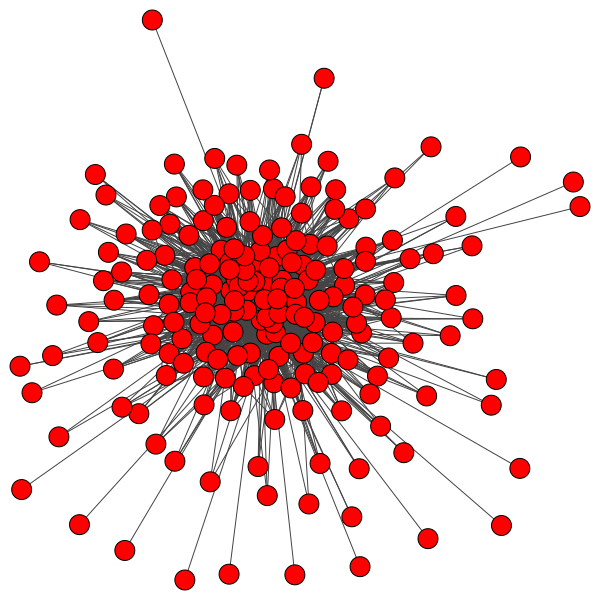

In [6]:
ig.plot(g)

In [7]:
g.diameter()

3

In [8]:
len(g.vs.indices)

196

In [9]:
#g.vs.indices
df_undir['node_1'].value_counts()

British Virgin Islands    158
Bahamas                    95
Hong Kong                  90
China                      88
Cyprus                     81
                         ... 
French Guiana               1
Haiti                       1
Dubai                       1
Mozambique                  1
Slovakia                    1
Name: node_1, Length: 172, dtype: int64

In [10]:
uni =df_undir['node_1'].unique()

In [11]:
len(uni)

172

In [12]:
list(g.vs)

[igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 0, {'name': 'Albania'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 1, {'name': 'Bahamas'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 2, {'name': 'Algeria'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 3, {'name': 'British Virgin Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 4, {'name': 'United Kingdom'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 5, {'name': 'United States'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 6, {'name': 'Andorra'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 7, {'name': 'Cayman Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 8, {'name': 'Cook Islands'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 9, {'name': 'Costa Rica'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 10, {'name': 'Hong Kong'}),
 igraph.Vertex(<igraph.Graph object at 0x7fa38bd5fd60>, 11, {'n

In [13]:
##similar to mini-proj, try a random target 
import random
random.seed(5104)
def unweighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True)
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'betweenness':bet,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [14]:
#try another function but this time with g.diameter having weight param 
#https://igraph.org/python/api/latest/igraph._igraph.GraphBase.html#diameter

random.seed(5104)
def weighted_Type1_random_delete(G):
    g = G.copy()
    
    nodes_removed =[]
    prop_removed =[]
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    bet = []
    for i in range(len(g.vs)):
        sample = random.sample(g.vs.indices,1)
        #print(sample)
        g.delete_vertices(sample)
        
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        between = g.betweenness(directed=True, weights='weight')
        bet.append(between)
        
        dense = g.density(loops=True)
        density.append(dense)
        #try in-degree
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        nodes_removed.append(i+1)
        
        


    df = pd.DataFrame({'nodes_removed':nodes_removed,
                       'prop_removed':prop_removed,
                       'diameter':dia,
                       'betweenness':bet,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [15]:
df_type1_unweighted = unweighted_Type1_random_delete(g)
df_type1_unweighted.head()

,nodes_removed,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,3.0,-0.556315,24.205128,0.123496,1.915517
1,2,0.01,3.0,-0.556133,24.288660,0.124557,1.914214
2,3,0.02,3.0,-0.555478,24.341969,0.125474,1.913428
3,4,0.02,3.0,-0.554013,24.343750,0.126133,1.913067
4,5,0.03,3.0,-0.553574,24.376963,0.126963,1.912428


In [16]:
df_type1_unweighted.tail()

,nodes_removed,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
191,192,0.98,0.0,NaN,0.0,0.0,NaN
192,193,0.98,0.0,NaN,0.0,0.0,NaN
193,194,0.99,0.0,NaN,0.0,0.0,NaN
194,195,0.99,0.0,NaN,0.0,0.0,NaN
195,196,1.00,NaN,NaN,0.0,NaN,NaN


In [17]:
df_type1_weighted = weighted_Type1_random_delete(g)
df_type1_weighted.head()

,nodes_removed,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,26.0,-0.555287,24.420513,0.124594,1.913931
1,2,0.01,26.0,-0.556025,24.257732,0.124399,1.914481
2,3,0.02,26.0,-0.557071,24.031088,0.123872,1.915425
3,4,0.02,26.0,-0.558547,23.989583,0.124298,1.915194
4,5,0.03,26.0,-0.557692,24.031414,0.125164,1.914577


In [18]:
df_type1_weighted.tail(15)

,nodes_removed,prop_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
181,182,0.93,58.0,-0.703963,2.428571,0.161905,1.666667
182,183,0.93,58.0,-0.696415,2.461538,0.175824,1.555556
183,184,0.94,58.0,-0.668848,2.500000,0.192308,1.464286
184,185,0.94,58.0,-0.643192,2.545455,0.212121,1.333333
185,186,0.95,58.0,-0.643192,2.800000,0.254545,1.333333
186,187,0.95,63.0,-0.763780,1.777778,0.177778,1.466667
187,188,0.96,63.0,-0.763780,2.000000,0.222222,1.466667
188,189,0.96,63.0,-0.763780,2.285714,0.285714,1.466667
189,190,0.97,63.0,-0.763780,2.666667,0.380952,1.466667
190,191,0.97,4240.0,-1.000000,1.200000,0.200000,1.500000


### Targeted attack

In [19]:
##try sort by indegree 
temp_df = pd.DataFrame({'Node_indice':g.vs.indices,
                         'Nodes':g.vs['name'],
                         'In_Degree':g.indegree()})

In [20]:
#sort by largest degree 
temp_df = temp_df.sort_values(by='In_Degree',ascending=False)

In [21]:
temp_df.head(50)

,Node_indice,Nodes,In_Degree
3,3,British Virgin Islands,183
15,15,Panama,154
10,10,Hong Kong,144
4,4,United Kingdom,141
16,16,Russia,130
5,5,United States,117
22,22,China,110
18,18,Seychelles,105
37,37,Cyprus,103
11,11,Ireland,102


In [22]:
temp_df.tail(50)

,Node_indice,Nodes,In_Degree
147,147,Morocco,5
32,32,Aruba,5
151,151,Nauru,5
161,161,Papua New Guinea,4
179,179,Suriname,4
158,158,Oman,4
98,98,Djibouti,4
54,54,Netherlands Antilles,4
145,145,Mongolia,4
69,69,Botswana,4


In [23]:
#extract out by Node
order_of_del = temp_df['Nodes'].tolist()

In [24]:
#print the list to check it
order_of_del

['British Virgin Islands',
 'Panama',
 'Hong Kong',
 'United Kingdom',
 'Russia',
 'United States',
 'China',
 'Seychelles',
 'Cyprus',
 'Ireland',
 'Bahamas',
 'Canada',
 'Cayman Islands',
 'Bermuda',
 'Barbados',
 'Singapore',
 'Saint Kitts and Nevis',
 'United Arab Emirates',
 'Niue',
 'Samoa',
 'Jersey',
 'Latvia',
 'British Anguilla',
 'Taiwan',
 'Luxembourg',
 'Switzerland',
 'Belize',
 'Isle of Man',
 'Cook Islands',
 'Ukraine',
 'Malaysia',
 'Indonesia',
 'Netherlands',
 'Nevada',
 'Malta',
 'Australia',
 'Mauritius',
 'Antigua and Barbuda',
 'Gibraltar',
 'Thailand',
 'Germany',
 'Israel',
 'US Virgin Islands',
 'Philippines',
 'India',
 'France',
 'New Zealand',
 'Sweden',
 'Venezuela',
 'Czech Republic',
 'Uruguay',
 'Guernsey',
 'Japan',
 'Spain',
 'South Africa',
 'Italy',
 'Austria',
 'Curaçao',
 'Brazil',
 'Colombia',
 'Liechtenstein',
 'South Korea',
 'Belgium',
 'Turks and Caicos Islands',
 'Monaco',
 'Costa Rica',
 'Vietnam',
 'Kazakhstan',
 'Argentina',
 'Ecuador',
 

In [25]:
def unweighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True)
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [26]:
#Weighted on diameter
def weighted_Type2_targeted_del(G):
    g = G.copy()
    
    num_node_removed = []
    prop_removed=[]
    node_removed = []
    dia = []
    assort_deg = []
    degree = []
    density = []
    apl = []
    for i in range(len(g.vs)):
        g.delete_vertices(order_of_del[i])
        #print(order_of_del[i])
        diameter = g.diameter(directed=True, weights='weight')
        dia.append(diameter)
        
        asdeg = g.assortativity_degree()
        assort_deg.append(asdeg)
        
        dense = g.density(loops=True)
        density.append(dense)
        
        deg = g.indegree()
        deg = sum(deg)/max(len(deg),1)
        degree.append(deg)
        
        avgpl = g.average_path_length()
        apl.append(avgpl)
        
        num_node_removed.append(i+1)
        prop = round((i+1)/196,2)
        prop_removed.append(prop)
        node_removed.append(order_of_del[i])


    df = pd.DataFrame({'num_nodes_removed':num_node_removed,
                       'prop_removed':prop_removed,
                       'node_removed':node_removed,
                       'diameter':dia,
                       'assortativity_degree':assort_deg,
                       'avg_indegree':degree,
                       'density':density,
                       'average_path_len':apl})
    
    return(df)

In [27]:
df_type2_unweighted = unweighted_Type2_targeted_del(g)
df_type2_unweighted.head()

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,4.0,-0.553123,22.615385,0.115385,1.962963
1,2,0.01,Panama,4.0,-0.544523,21.154639,0.108485,1.988591
2,3,0.02,Hong Kong,4.0,-0.536278,19.792746,0.102024,2.006021
3,4,0.02,United Kingdom,4.0,-0.528282,18.458333,0.095639,2.046952
4,5,0.03,Russia,4.0,-0.518999,17.235602,0.089769,2.082563


In [28]:
df_type2_unweighted.tail()

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
191,192,0.98,Cameroon,0.0,NaN,0.0,0.0,NaN
192,193,0.98,Central African Republic,0.0,NaN,0.0,0.0,NaN
193,194,0.99,Sudan,0.0,NaN,0.0,0.0,NaN
194,195,0.99,Sint Maarten (Dutch part),0.0,NaN,0.0,0.0,NaN
195,196,1.00,Albania,NaN,NaN,0.0,NaN,NaN


In [29]:
df_type2_weighted = weighted_Type2_targeted_del(g)
df_type2_weighted.head(15)

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
0,1,0.01,British Virgin Islands,22.0,-0.553123,22.615385,0.115385,1.962963
1,2,0.01,Panama,22.0,-0.544523,21.154639,0.108485,1.988591
2,3,0.02,Hong Kong,22.0,-0.536278,19.792746,0.102024,2.006021
3,4,0.02,United Kingdom,138.0,-0.528282,18.458333,0.095639,2.046952
4,5,0.03,Russia,273.0,-0.518999,17.235602,0.089769,2.082563
5,6,0.03,United States,381.0,-0.509981,16.147368,0.084541,2.104315
6,7,0.04,China,381.0,-0.501048,15.132275,0.079644,2.118907
7,8,0.04,Seychelles,381.0,-0.493502,14.170213,0.074975,2.105978
8,9,0.05,Cyprus,381.0,-0.485394,13.229947,0.070372,2.126905
9,10,0.05,Ireland,381.0,-0.474682,12.301075,0.065781,2.159409


In [30]:
df_type2_weighted.tail(15)

,num_nodes_removed,prop_removed,node_removed,diameter,assortativity_degree,avg_indegree,density,average_path_len
181,182,0.93,Palestine,0.0,NaN,0.0,0.0,NaN
182,183,0.93,Yemen,0.0,NaN,0.0,0.0,NaN
183,184,0.94,Northern Mariana Islands,0.0,NaN,0.0,0.0,NaN
184,185,0.94,Norfolk Island,0.0,NaN,0.0,0.0,NaN
185,186,0.95,Uganda,0.0,NaN,0.0,0.0,NaN
186,187,0.95,Zambia,0.0,NaN,0.0,0.0,NaN
187,188,0.96,Dubai,0.0,NaN,0.0,0.0,NaN
188,189,0.96,Saint Martin (French part),0.0,NaN,0.0,0.0,NaN
189,190,0.97,Benin,0.0,NaN,0.0,0.0,NaN
190,191,0.97,Mali,0.0,NaN,0.0,0.0,NaN


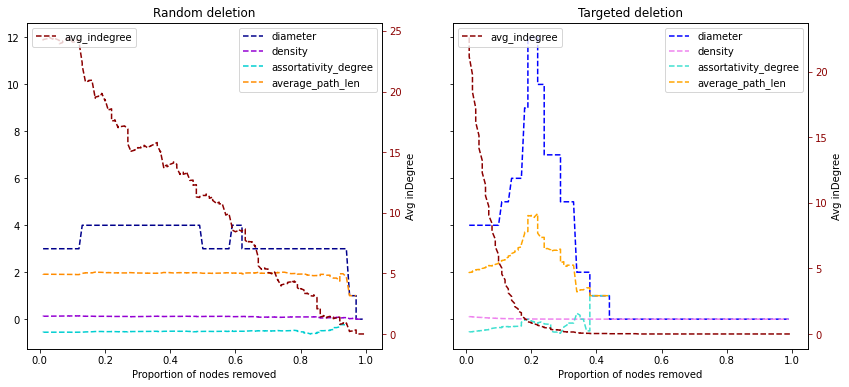

In [31]:
#Try plotting unweighted
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=True)
ax2_1 = ax[0].twinx()
ax[0].plot('prop_removed','diameter',data=df_type1_unweighted,ls='--',color='darkblue')
ax[0].plot('prop_removed','density',data=df_type1_unweighted,ls='--',color='darkviolet')
ax2_1.plot('prop_removed','avg_indegree',data=df_type1_unweighted,ls='--',color='darkred')
ax[0].plot('prop_removed','assortativity_degree',data=df_type1_unweighted,ls='--',color='darkturquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type1_unweighted,ls='--',color='darkorange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Random deletion')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

ax2_2 = ax[1].twinx()
ax[1].plot('prop_removed','diameter',data=df_type2_unweighted,ls='--',color='blue')
ax[1].plot('prop_removed','density',data=df_type2_unweighted,ls='--',color='violet')
ax2_2.plot('prop_removed','avg_indegree',data=df_type2_unweighted,ls='--',color='darkred')
ax[1].plot('prop_removed','assortativity_degree',data=df_type2_unweighted,ls='--',color='turquoise')
ax[1].plot('prop_removed','average_path_len',data=df_type2_unweighted,ls='--',color='orange')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Proportion of nodes removed')
ax[1].set_title('Targeted deletion')
ax2_2.tick_params('y',colors='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
plt.show()

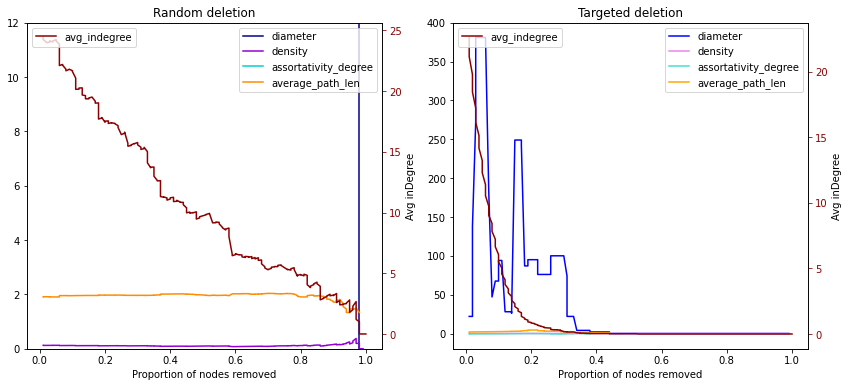

In [32]:
#Same but weighted
#Don't share y axis for type2
fig, ax = plt.subplots(1,2,figsize=(14,6),sharey=False)
ax2_1 = ax[0].twinx()
ax[0].plot('prop_removed','diameter',data=df_type1_weighted,ls='-',color='darkblue')
#set ylimit to 0 - 12 (to be same as type1; else there's a jump to 4000 for diameter)
ax[0].set_ylim([0,12])
ax[0].plot('prop_removed','density',data=df_type1_weighted,ls='-',color='darkviolet')
ax2_1.plot('prop_removed','avg_indegree',data=df_type1_weighted,ls='-',color='darkred')
ax[0].plot('prop_removed','assortativity_degree',data=df_type1_weighted,ls='-',color='darkturquoise')
ax[0].plot('prop_removed','average_path_len',data=df_type1_weighted,ls='-',color='darkorange')
ax[0].legend(loc='upper right')
ax[0].set_xlabel('Proportion of nodes removed')
ax[0].set_title('Random deletion')
ax2_1.tick_params('y',colors='darkred')
ax2_1.set_ylabel('Avg inDegree')
ax2_1.legend(loc='upper left')

ax2_2 = ax[1].twinx()
ax[1].plot('prop_removed','diameter',data=df_type2_weighted,ls='-',color='blue')
ax[1].plot('prop_removed','density',data=df_type2_weighted,ls='-',color='violet')
ax2_2.plot('prop_removed','avg_indegree',data=df_type2_weighted,ls='-',color='darkred')
ax[1].plot('prop_removed','assortativity_degree',data=df_type2_weighted,ls='-',color='turquoise')
ax[1].plot('prop_removed','average_path_len',data=df_type2_weighted,ls='-',color='orange')
ax[1].legend(loc='upper right')
ax[1].set_xlabel('Proportion of nodes removed')
ax[1].set_title('Targeted deletion')
ax2_2.tick_params('y',colors='darkred')
ax2_2.set_ylabel('Avg inDegree')
ax2_2.legend(loc='upper left')
plt.show()